# step-1. Bussiness problem understanding
- identify relationship between advertising spends and sales ?
- our next adcampaign will have total spend of $200,000, how many unit do we expect to sellas a result of this?

# Step-2. Data Understanding

- Data
  This sample data display sales for particular product as a function of advertisiing budgets (in doller) for tv ,radio,and newspaper media

  **Independent variable**
  
  - TV: Advertising dollars spent on Tv for single product in a given market (in dollar)
  - Radio: Advertising dollars spent on radio
  - newspaper:Advertising dollars spent on newspaper

  **Target variable**

  - sales: sales of a single product in a given market
 
  - collect & load data
  - Dataset understanding
  
  

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd .read_csv("advertising.csv")
df.head()
#

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


- by combining all the future ,we get the "total spend"

In [58]:
df['total_spend']= df['TV']  + df['Radio'] + df['Newspaper']
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,total_spend
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0


In [60]:
df= df.drop(columns=['TV','Radio','Newspaper'])
df.head()

,Unnamed: 0,Sales,total_spend
0,1,22.1,337.1
1,2,10.4,128.9
2,3,9.3,132.4
3,4,18.5,251.3
4,5,12.9,250.0


In [75]:
continous= ["total_spend","Sales"]

- Eexploratory Data Analysis

In [78]:
df[continous].describe()

,total_spend,Sales
count,200.000000,200.000000
mean,200.860500,14.022500
std,92.985181,5.217457
min,11.700000,1.600000
25%,123.550000,10.375000
50%,207.350000,12.900000
75%,281.125000,17.400000
max,433.600000,27.000000


In [80]:
df[continous].skew()

total_spend    0.049488
Sales          0.407571
dtype: float64

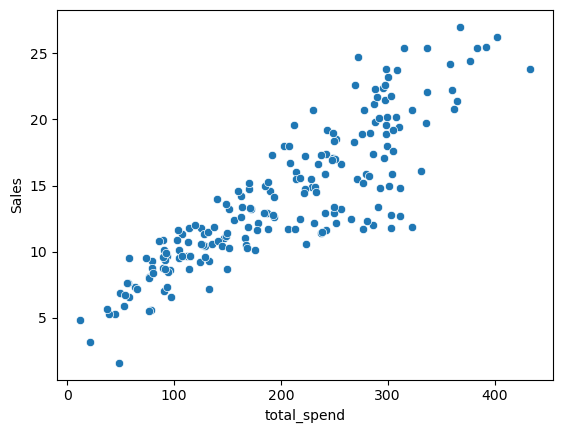

In [94]:
sns.scatterplot(x="total_spend",y="Sales",data= df)
plt.show()

In [96]:
df[continous].corr()

,total_spend,Sales
total_spend,1.000000,0.867712
Sales,0.867712,1.000000


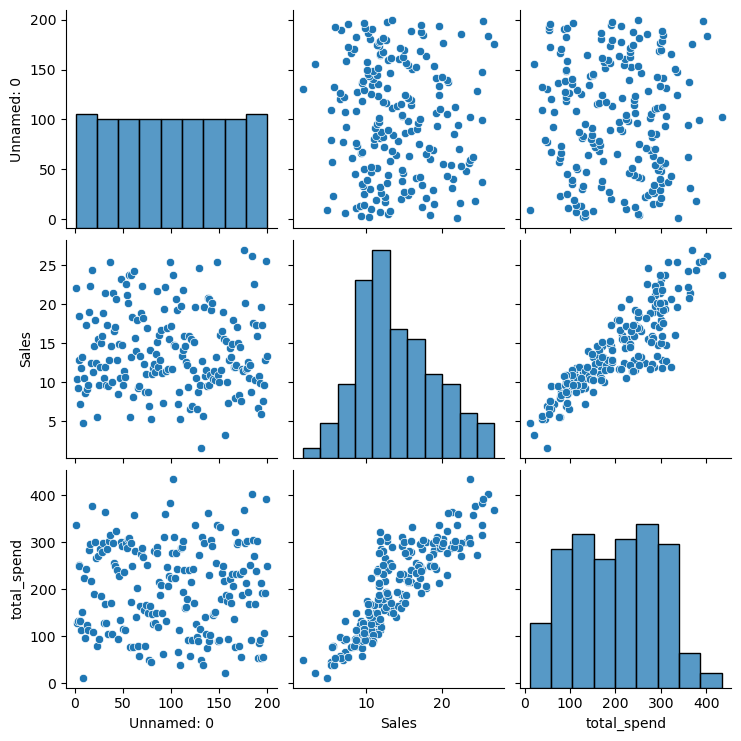

In [98]:
sns.pairplot(df)
plt.show()

# Data preprocssing

- Data cleaning

In [103]:
df.isnull().sum()

Unnamed: 0     0
Sales          0
total_spend    0
dtype: int64

- Data wrangling

In [106]:
# no encoding is required(no categorical data)

- Scaling

In [109]:
# scaling is not required
# scaling application when we multiple input variable with different magnitude
# Neverapply scaling on output variable

Create X and y

In [117]:
X=df[["total_spend"]]   #x= df.drop("sales",axis=1)
y= df["Sales"]

train-test split

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=77)

# Step-4: modeling 

                   $\(y=\beta _{0}+\beta _{1}x\)$

In [128]:
# import 
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#fit
model.fit(X_train,y_train)

LinearRegression()

In [130]:
# coefficient
print("coefficient:",model.coef_)

#Intersept
print("Intersept:",model.intercept_)

coefficient: [0.04784052]
Intersept: 4.389814518436081


formmula above

sales = 0.04784052(total_spend)+4.3898145    this is a model

# step-5. Evalution


In [162]:
# prediction on train data
ypred_train=model.predict(X_train)

# Evaluation
from sklearn.metrics import mean_squared_error
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("train R2:",r2_score(y_train,ypred_train))

Train RMSE: 2.6280117251845
train R2: 0.7426281082244576


In [166]:
#diction on test data
ypred_test=model.predict(X_test)

#evaluation on test data
print("Train RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("train R2:",r2_score(y_test,ypred_test))

Train RMSE: 2.4225901737040254
train R2: 0.7868779454628925


In [142]:
from sklearn.metrics import r2_score
print("train R2:",r2_score(y_train,ypred_train))

train R2: 0.7426281082244576


In [168]:
#cross validation score
from sklearn.model_selection import cross_val_score
print("cv Score:",cross_val_score(model,X_train,y_train,cv=5,scoring="r2").mean())

cv Score: 0.7326556921038281


# Model selection

checklist1:check whether model is good or either having overfitting /underfitting problem

checklist:whether test accuracy = cross validation score

checkllist3:check whether, satisfy the bussiness problem requirments

                      sales = 0.04784052(total_spend)+4.3898145 this is a model

**intercepting the coefficient**

- A 1 unit increses in total spend is associated with an increses of 0.04784 ubit in sales.
- this basically means that for every $10000 dollers spend on ads,we could expert 478 moe unit sold

**use the model prediction on a new value.for a total spend of 200k on ads , how many units could be expect to be sold?**


In [179]:
model.predict([[200000]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9572.49476417])

### save the model

In [186]:
from joblib import dump

# dump(modelname,name to saved)

dump(model,'sales_model.joblib')

['sales_model.joblib']